# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from scipy import stats
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set lists
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count=0

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {count}"+f" ID:{response['id']}"f" | {response['name']}.")
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        count+=1
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 0 ID:1643837 | Gorontalo.
Processing Record 1 ID:1627035 | Simpang.
Processing Record 2 ID:4030556 | Rikitea.
Processing Record 3 ID:5746545 | Portland.
Processing Record 4 ID:3893726 | Constitución.
Processing Record 5 ID:1507390 | Dikson.
Processing Record 6 ID:6201424 | Mataura.
Processing Record 7 ID:2074865 | Carnarvon.
Processing Record 8 ID:5122534 | Jamestown.
Processing Record 9 ID:5106841 | Albany.
Processing Record 10 ID:2163355 | Hobart.
Processing Record 11 ID:2070998 | Geraldton.
Processing Record 12 ID:4020109 | Atuona.
Processing Record 13 ID:2173911 | Broken Hill.
Processing Record 14 ID:2429344 | Kyabé.
Processing Record 15 ID:3516171 | Barra de Tecoanapa.
Processing Record 16 ID:5924351 | Clyde River.
Processing Record 17 ID:1272596 | Digras.
Processing Record 18 ID:2269142 | Colares.
Processing Record 19 ID:3430863 | Mar del Plata.
Process

Processing Record 171 ID:4013679 | Coahuayana Viejo.
City not found. Skipping...
Processing Record 172 ID:1576303 | Lao Cai.
Processing Record 173 ID:610612 | Aktau.
Processing Record 174 ID:4350461 | Carroll.
Processing Record 175 ID:1078553 | Ampanihy.
Processing Record 176 ID:5563839 | Fortuna.
Processing Record 177 ID:5847411 | Kahului.
Processing Record 178 ID:5072006 | Lincoln.
Processing Record 179 ID:3625428 | Venezuela.
Processing Record 180 ID:209598 | Manono.
Processing Record 181 ID:1512223 | Abalak.
Processing Record 182 ID:6170031 | Tuktoyaktuk.
Processing Record 183 ID:3527213 | Guerrero.
Processing Record 184 ID:2561668 | Santa Cruz.
Processing Record 185 ID:1006984 | East London.
Processing Record 186 ID:3393471 | Oriximiná.
Processing Record 187 ID:3183719 | Vlorë.
Processing Record 188 ID:2304548 | Anloga.
Processing Record 189 ID:2399831 | Lékoni.
Processing Record 190 ID:934322 | Mahébourg.
Processing Record 191 ID:3430443 | Necochea.
Processing Record 192 ID:17264

Processing Record 346 ID:4362001 | Mayo.
Processing Record 347 ID:2158767 | Mareeba.
Processing Record 348 ID:3396121 | Luís Correia.
Processing Record 349 ID:3382160 | Cayenne.
Processing Record 350 ID:556268 | Ostrovnoy.
Processing Record 351 ID:1259395 | Porbandar.
Processing Record 352 ID:2656847 | Atherton.
Processing Record 353 ID:3948613 | Acarí.
Processing Record 354 ID:486923 | Bolshaya Glushitsa.
Processing Record 355 ID:3351663 | Benguela.
Processing Record 356 ID:1488903 | Turukhansk.
Processing Record 357 ID:3691954 | Sechura.
Processing Record 358 ID:3703443 | Panama City.
Processing Record 359 ID:610611 | Aktobe.
Processing Record 360 ID:2036892 | Hohhot.
Processing Record 361 ID:2537763 | Salé.
Processing Record 362 ID:3860443 | Comodoro Rivadavia.
Processing Record 363 ID:3412093 | Vestmannaeyjar.
Processing Record 364 ID:2169113 | Deloraine.
Processing Record 365 ID:792241 | Brus.
Processing Record 366 ID:5954718 | Flin Flon.
Processing Record 367 ID:2094342 | Kavieng

Processing Record 518 ID:3347762 | Lubango.
Processing Record 519 ID:3877918 | Ovalle.
Processing Record 520 ID:3994469 | Ojinaga.
Processing Record 521 ID:2033135 | Zhengjiatun.
Processing Record 522 ID:5404476 | Ukiah.
Processing Record 523 ID:358620 | Safaga.
Processing Record 524 ID:1863521 | Gōtsuchō.
Processing Record 525 ID:2021041 | Kyra.
Processing Record 526 ID:292968 | Abu Dhabi.
Processing Record 527 ID:2387926 | Bouar.
Processing Record 528 ID:1798760 | Pingliang.
Processing Record 529 ID:3663684 | Lábrea.
Processing Record 530 ID:686090 | Asău.
Processing Record 531 ID:5821593 | Cody.
Processing Record 532 ID:3419842 | Sisimiut.
Processing Record 533 ID:548493 | Kirgiz-Miyaki.
Processing Record 534 ID:6316343 | Alta Floresta.
City not found. Skipping...
Processing Record 535 ID:1052944 | Angoche.
Processing Record 536 ID:3435910 | Buenos Aires.
Processing Record 537 ID:6355222 | Yulara.
Processing Record 538 ID:475469 | Verkhnetulomskiy.
Processing Record 539 ID:878121 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#set up new df
zippedList =  list(zip(city_list, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed))

new_df = pd.DataFrame(zippedList,columns =['City', 'Cloudiness','Country','Date','Humidity','Lat',
                                          'Lng','Max Temp', 'Wind Speed'])
new_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gorontalo,94,ID,1585507965,87,0.54,123.06,75.56,3.27
1,Simpang,0,ID,1585507965,84,-1.27,104.08,78.85,5.37
2,Rikitea,59,PF,1585507966,80,-23.12,-134.97,79.21,11.72
3,Portland,75,US,1585507674,76,45.52,-122.68,54.00,13.87
4,Constitución,37,CL,1585507966,51,-35.33,-72.42,67.17,14.85


In [5]:
# Specify the file to write to
new_df.to_csv(r"../output_data/new_list.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

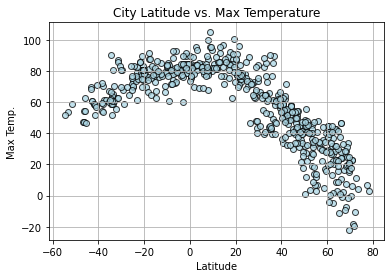

In [6]:
plt.scatter(new_df['Lat'],new_df['Max Temp'], marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

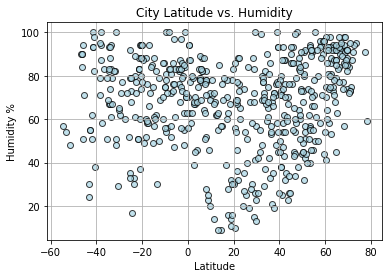

In [7]:
plt.scatter(new_df['Lat'],new_df['Humidity'], marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

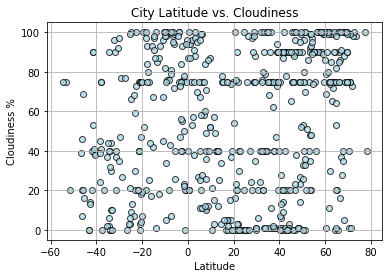

In [8]:
plt.scatter(new_df['Lat'],new_df['Cloudiness'], marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

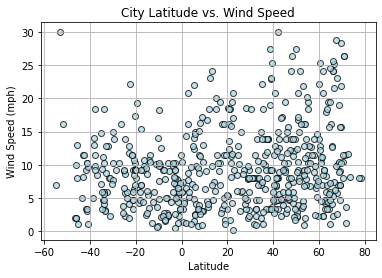

In [9]:
plt.scatter(new_df['Lat'],new_df['Wind Speed'], marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.88319491790634


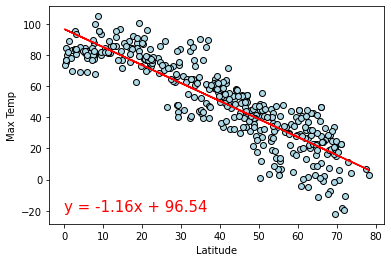

In [10]:
#all cities in northern hemisphere
north_df = new_df[new_df['Lat']>=0]

x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.01,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('Images/nmt',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7287200303394699


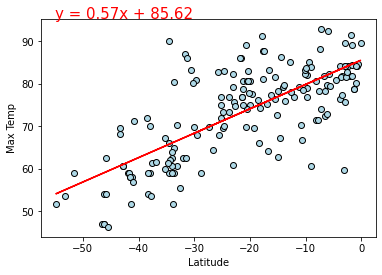

In [28]:
#all cities in northern hemisphere
south_df = new_df[new_df['Lat']<=0]
south_df

x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95.3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('Images/smt',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31684272074324504


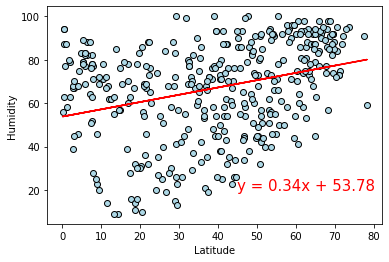

In [12]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Images/nh',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06425148760949566


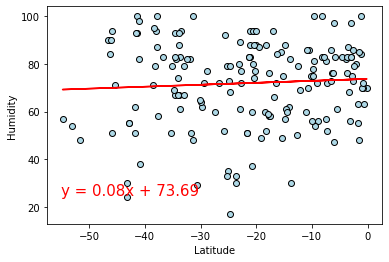

In [13]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Images/sh',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2700347575847519


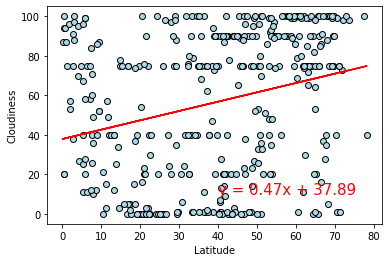

In [14]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Images/nc',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.35136253472314327


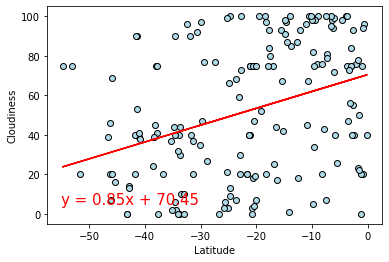

In [15]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Images/sc',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15156766937974592


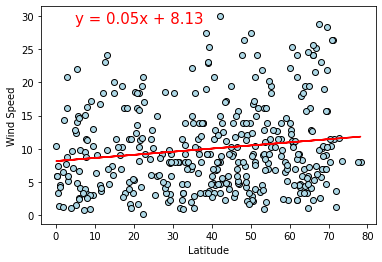

In [29]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,29),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Images/nws',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2240912931322083


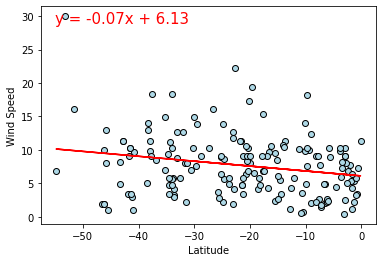

In [30]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,29),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Images/sws',dpi=200)
print(f"The r-squared is: {rvalue}")
plt.show()